## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  23.914826   679.625834  0.203472  4.359377  1.468218
1  31.169405   442.461603  0.649451  6.407897  1.322379
2  16.803783   895.078601  0.184929  9.596495  1.444254
3  98.727610   734.004304  0.780556  2.875103  1.372270
4  21.215335  1289.492523  0.494445  6.490017  1.567060


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9786226	total: 68.4ms	remaining: 1m 8s
1:	learn: 0.9684989	total: 68.9ms	remaining: 34.4s
2:	learn: 0.9566219	total: 69.3ms	remaining: 23s
3:	learn: 0.9462940	total: 69.7ms	remaining: 17.4s
4:	learn: 0.9339782	total: 70.1ms	remaining: 14s
5:	learn: 0.9241665	total: 70.5ms	remaining: 11.7s
6:	learn: 0.9123168	total: 70.9ms	remaining: 10.1s
7:	learn: 0.9000042	total: 71.3ms	remaining: 8.84s
8:	learn: 0.8873725	total: 71.7ms	remaining: 7.89s
9:	learn: 0.8772279	total: 72.1ms	remaining: 7.14s
10:	learn: 0.8674261	total: 72.5ms	remaining: 6.52s
11:	learn: 0.8580110	total: 73ms	remaining: 6.01s
12:	learn: 0.8507204	total: 73.4ms	remaining: 5.57s
13:	learn: 0.8410575	total: 74ms	remaining: 5.21s
14:	learn: 0.8309526	total: 74.4ms	remaining: 4.89s
15:	learn: 0.8224374	total: 74.9ms	remaining: 4.61s
16:	learn: 0.8115594	total: 75.4ms	remaining: 4.36s
17:	learn: 0.8032944	total: 75.8ms	remaining: 4.14s
18:	learn: 0.7950233	total: 76.4ms	remaining: 3.94s


105:	learn: 0.3530877	total: 117ms	remaining: 985ms
106:	learn: 0.3505995	total: 117ms	remaining: 979ms
107:	learn: 0.3487156	total: 118ms	remaining: 973ms
108:	learn: 0.3456602	total: 118ms	remaining: 967ms
109:	learn: 0.3430255	total: 119ms	remaining: 961ms
110:	learn: 0.3398665	total: 119ms	remaining: 954ms
111:	learn: 0.3372983	total: 120ms	remaining: 948ms
112:	learn: 0.3346935	total: 120ms	remaining: 942ms
113:	learn: 0.3327766	total: 121ms	remaining: 937ms
114:	learn: 0.3303577	total: 121ms	remaining: 931ms
115:	learn: 0.3277660	total: 121ms	remaining: 925ms
116:	learn: 0.3251570	total: 122ms	remaining: 919ms
117:	learn: 0.3229166	total: 122ms	remaining: 914ms
118:	learn: 0.3205842	total: 123ms	remaining: 909ms
119:	learn: 0.3180408	total: 123ms	remaining: 903ms
120:	learn: 0.3160247	total: 124ms	remaining: 898ms
121:	learn: 0.3146078	total: 124ms	remaining: 893ms
122:	learn: 0.3122988	total: 124ms	remaining: 887ms
123:	learn: 0.3102180	total: 125ms	remaining: 881ms
124:	learn: 

265:	learn: 0.1489872	total: 187ms	remaining: 517ms
266:	learn: 0.1484154	total: 188ms	remaining: 515ms
267:	learn: 0.1479442	total: 188ms	remaining: 514ms
268:	learn: 0.1474970	total: 189ms	remaining: 513ms
269:	learn: 0.1469778	total: 189ms	remaining: 511ms
270:	learn: 0.1465606	total: 190ms	remaining: 510ms
271:	learn: 0.1460299	total: 190ms	remaining: 509ms
272:	learn: 0.1454903	total: 191ms	remaining: 507ms
273:	learn: 0.1449736	total: 191ms	remaining: 506ms
274:	learn: 0.1443569	total: 192ms	remaining: 505ms
275:	learn: 0.1438927	total: 192ms	remaining: 504ms
276:	learn: 0.1434894	total: 192ms	remaining: 502ms
277:	learn: 0.1429335	total: 193ms	remaining: 501ms
278:	learn: 0.1422627	total: 193ms	remaining: 499ms
279:	learn: 0.1417477	total: 194ms	remaining: 498ms
280:	learn: 0.1412304	total: 194ms	remaining: 497ms
281:	learn: 0.1407464	total: 195ms	remaining: 495ms
282:	learn: 0.1403248	total: 195ms	remaining: 494ms
283:	learn: 0.1398535	total: 195ms	remaining: 492ms
284:	learn: 

517:	learn: 0.0710898	total: 298ms	remaining: 277ms
518:	learn: 0.0708068	total: 298ms	remaining: 277ms
519:	learn: 0.0707531	total: 299ms	remaining: 276ms
520:	learn: 0.0704841	total: 299ms	remaining: 275ms
521:	learn: 0.0703051	total: 300ms	remaining: 274ms
522:	learn: 0.0700093	total: 300ms	remaining: 274ms
523:	learn: 0.0699690	total: 301ms	remaining: 273ms
524:	learn: 0.0697544	total: 301ms	remaining: 272ms
525:	learn: 0.0697020	total: 301ms	remaining: 272ms
526:	learn: 0.0694386	total: 302ms	remaining: 271ms
527:	learn: 0.0692659	total: 302ms	remaining: 270ms
528:	learn: 0.0690976	total: 303ms	remaining: 269ms
529:	learn: 0.0690445	total: 303ms	remaining: 269ms
530:	learn: 0.0688342	total: 304ms	remaining: 268ms
531:	learn: 0.0687830	total: 304ms	remaining: 267ms
532:	learn: 0.0685594	total: 304ms	remaining: 267ms
533:	learn: 0.0684872	total: 305ms	remaining: 266ms
534:	learn: 0.0684144	total: 305ms	remaining: 265ms
535:	learn: 0.0683435	total: 306ms	remaining: 265ms
536:	learn: 

675:	learn: 0.0485309	total: 368ms	remaining: 176ms
676:	learn: 0.0483339	total: 369ms	remaining: 176ms
677:	learn: 0.0482995	total: 369ms	remaining: 175ms
678:	learn: 0.0482677	total: 369ms	remaining: 175ms
679:	learn: 0.0481054	total: 370ms	remaining: 174ms
680:	learn: 0.0480717	total: 370ms	remaining: 173ms
681:	learn: 0.0479023	total: 371ms	remaining: 173ms
682:	learn: 0.0477497	total: 371ms	remaining: 172ms
683:	learn: 0.0477183	total: 372ms	remaining: 172ms
684:	learn: 0.0476870	total: 372ms	remaining: 171ms
685:	learn: 0.0475286	total: 372ms	remaining: 170ms
686:	learn: 0.0473789	total: 373ms	remaining: 170ms
687:	learn: 0.0473478	total: 373ms	remaining: 169ms
688:	learn: 0.0471558	total: 373ms	remaining: 169ms
689:	learn: 0.0471256	total: 374ms	remaining: 168ms
690:	learn: 0.0469703	total: 374ms	remaining: 167ms
691:	learn: 0.0468081	total: 375ms	remaining: 167ms
692:	learn: 0.0466152	total: 375ms	remaining: 166ms
693:	learn: 0.0465854	total: 375ms	remaining: 166ms
694:	learn: 

923:	learn: 0.0259703	total: 480ms	remaining: 39.5ms
924:	learn: 0.0259216	total: 480ms	remaining: 39ms
925:	learn: 0.0258833	total: 481ms	remaining: 38.4ms
926:	learn: 0.0258357	total: 481ms	remaining: 37.9ms
927:	learn: 0.0257331	total: 482ms	remaining: 37.4ms
928:	learn: 0.0256856	total: 482ms	remaining: 36.8ms
929:	learn: 0.0256391	total: 483ms	remaining: 36.3ms
930:	learn: 0.0255935	total: 483ms	remaining: 35.8ms
931:	learn: 0.0255469	total: 483ms	remaining: 35.3ms
932:	learn: 0.0254990	total: 484ms	remaining: 34.7ms
933:	learn: 0.0253751	total: 484ms	remaining: 34.2ms
934:	learn: 0.0252774	total: 485ms	remaining: 33.7ms
935:	learn: 0.0252321	total: 485ms	remaining: 33.2ms
936:	learn: 0.0251927	total: 485ms	remaining: 32.6ms
937:	learn: 0.0250968	total: 486ms	remaining: 32.1ms
938:	learn: 0.0250440	total: 486ms	remaining: 31.6ms
939:	learn: 0.0249880	total: 487ms	remaining: 31.1ms
940:	learn: 0.0248769	total: 487ms	remaining: 30.5ms
941:	learn: 0.0247832	total: 488ms	remaining: 30

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


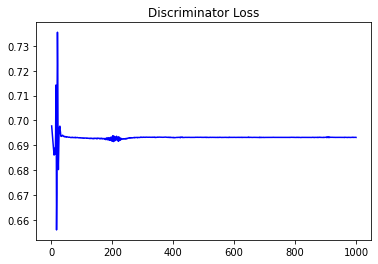

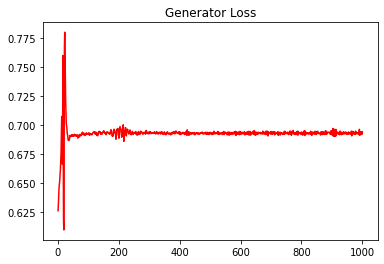

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.40670285910394943


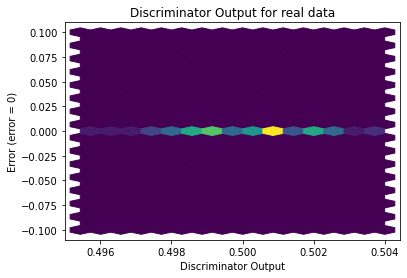

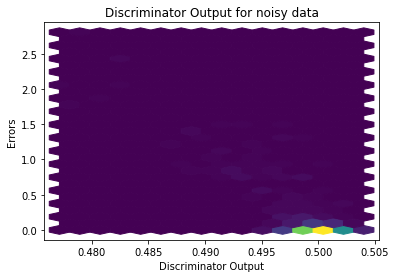

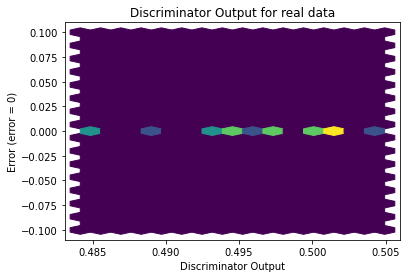

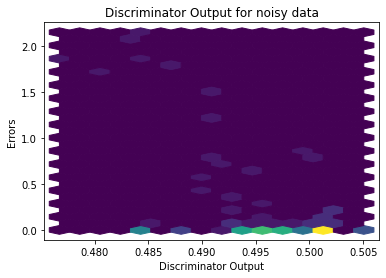

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4941]], requires_grad=True)
